# Explore here

Step 1: Data collection

In [1]:
import pandas as pd 
total_data = pd.read_csv("http://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
total_data.to_csv("../data/raw/total_data.csv", index = False)


Step 2: Exploration and data cleaning 

In [2]:
# Obtain dimensions
total_data.shape

(48895, 16)

The DataFrame contains 48.895 records (rows) and 16 variables (columns). 

In [3]:
#Obtain information about data types and non-nul values 
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In the information below shows that is missing some values, but "last_review " and "reviews_per_month" are the ones missing bigger certain of values. 

In terms of data type we can share in two: 
- Numerical: price, minimum_nights, number_of_reviews, reviews_per_month, availability_365
- Categorical: room_type, neighbourhood, neighbourhood_group


Eliminate duplicates 

In [11]:
print(total_data["id"].duplicated().sum())
print(total_data["name"].duplicated().sum())
print(total_data["host_id"].duplicated().sum())

0
989
11438


In [15]:
total_data = total_data.drop_duplicates(subset=["name"], keep="first")
print("Duplicate names removed successfully!")
total_data = total_data.drop_duplicates(subset=["host_id"], keep="first")
print("Duplicate host_id removed successfully!")
total_data.head()

Duplicate names removed successfully!
Duplicate host_id removed successfully!


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
missing_values = total_data.isnull().sum()
missing_percentage = (missing_values / len(total_data)) * 100
print(missing_percentage)


id                                 0.000000
name                               0.002712
host_id                            0.000000
host_name                          0.048819
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       19.606195
reviews_per_month                 19.606195
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


In [24]:
type(total_data)




NoneType

In [25]:
import pandas as pd

# Assuming your dataset is in a CSV file
total_data = pd.read_csv("http://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")



In [26]:
total_data.drop(["id", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True)

# Confirm changes
total_data.head()


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Step 3: Analysis of univariate variables

Analysis on categorical variables

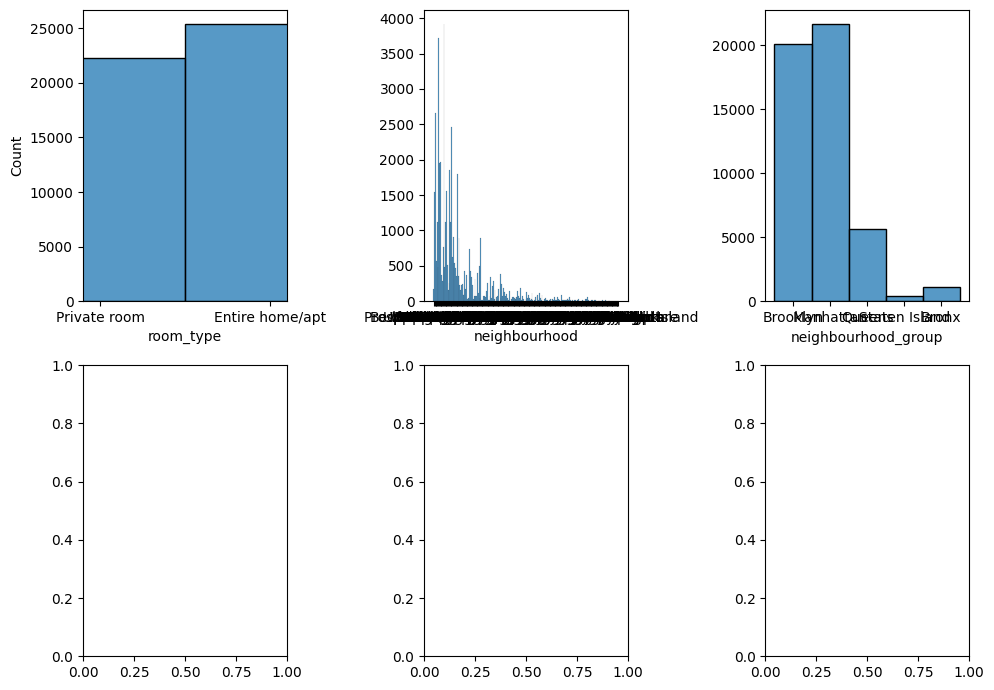

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns 

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

#Create Histogram 
sns.histplot(ax = axis[0, 0], data = total_data, x = "room_type").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "neighbourhood_group").set(ylabel = None)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the histogram we can observe: 
- The majority type of room published in Airbnb are entire home or apartment; 
- Some neighborhoods obviously have more offers of Airbnb rooms than others; 
- In our dataset, we only have 5 areas, Brooklyn, Manhattan, Queens, Staten Island, and the Bronx, the 5 Boroughs, which confirms that we are really only analyzing New York City.

Analysis on numeric variables

price, minimum_nights, number_of_reviews, reviews_per_month, availability_365

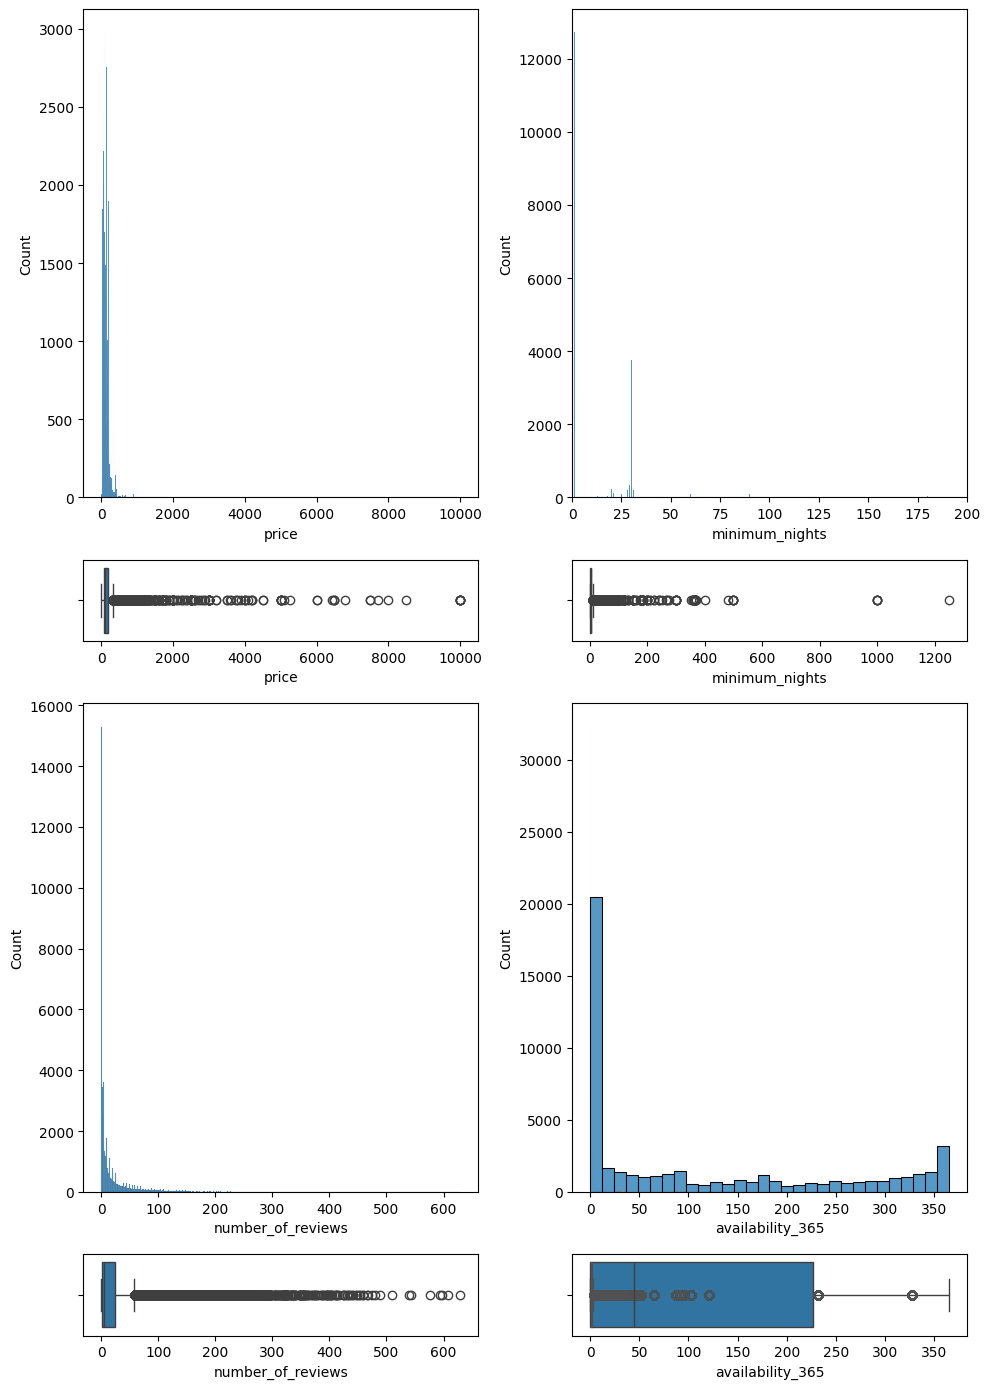

In [34]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "availability_365")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "availability_365")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")  
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count") 

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
print(total_data.columns)


Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


Step 4: Analysis of multivariate variables

Numerical-numerical analysis

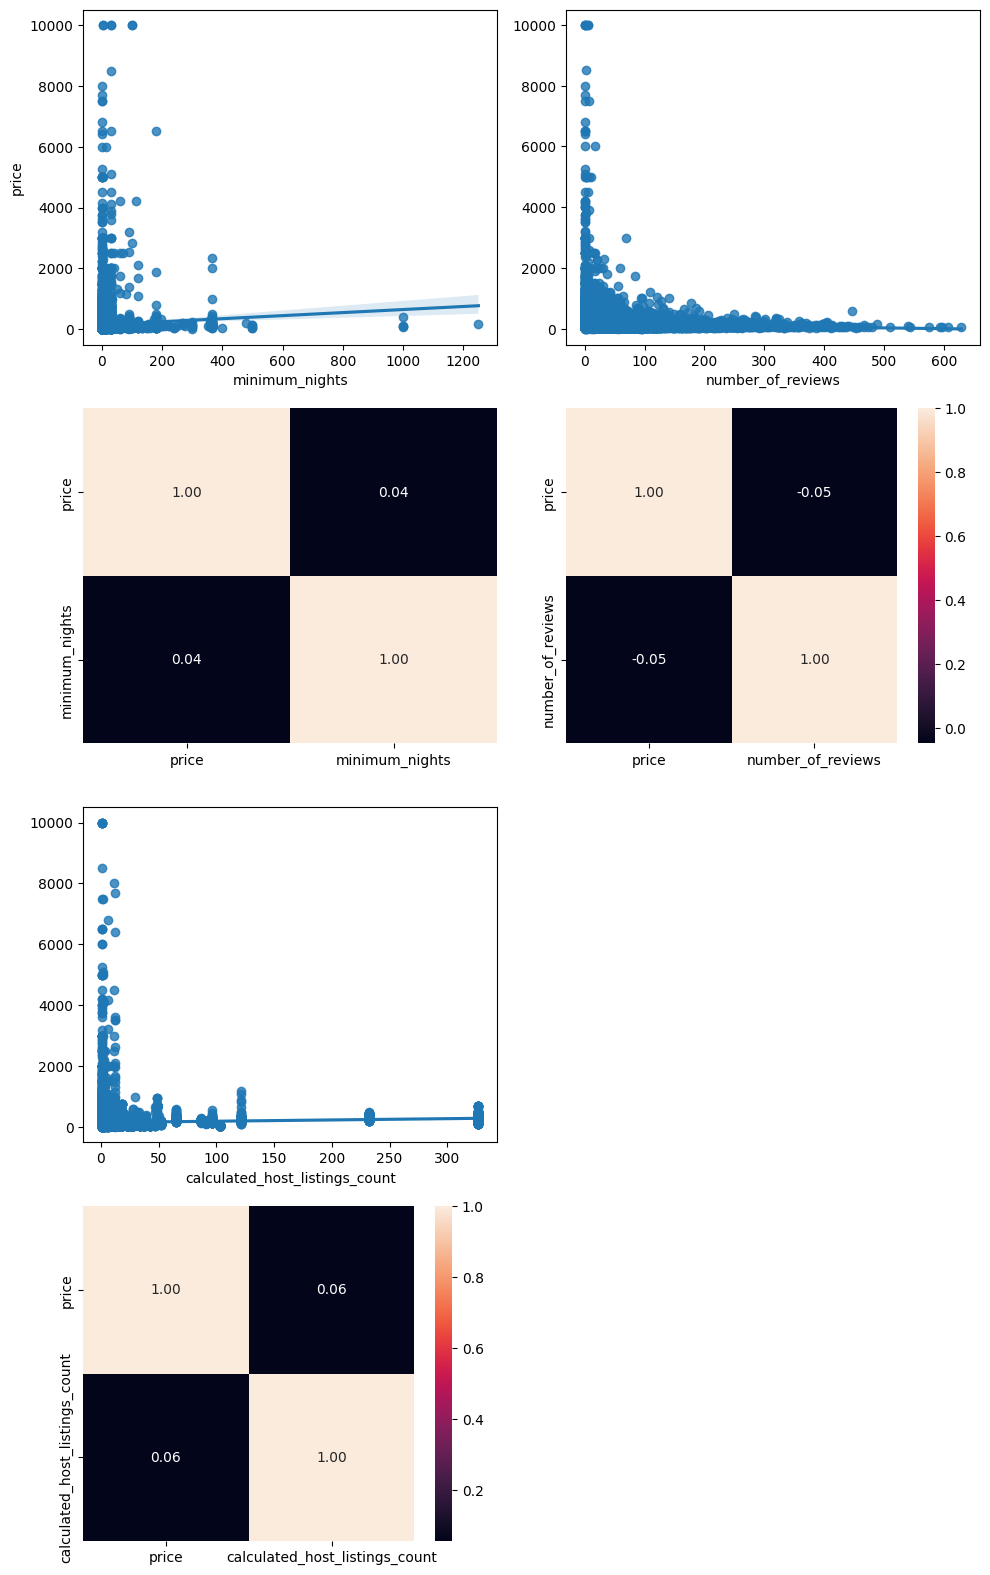

In [35]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

There's no relation between the price and minimum number of nights.
There's no relation between the number of reviews and the price.

Categorical-categorical analysis

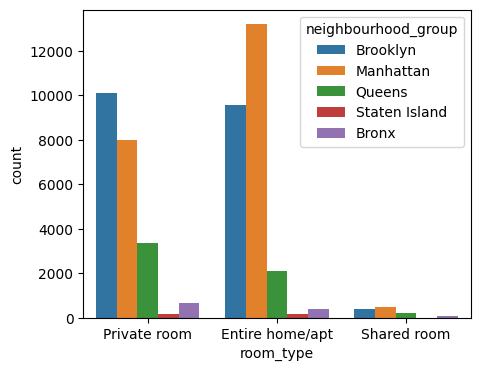

In [36]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

We can observe in this graphic that in Manhattan people rent the entire home/apt, but in Brooklyn people rent the private room and it is posible to see that rather never people share the room. 

Numerical-categorical analysis (complete)

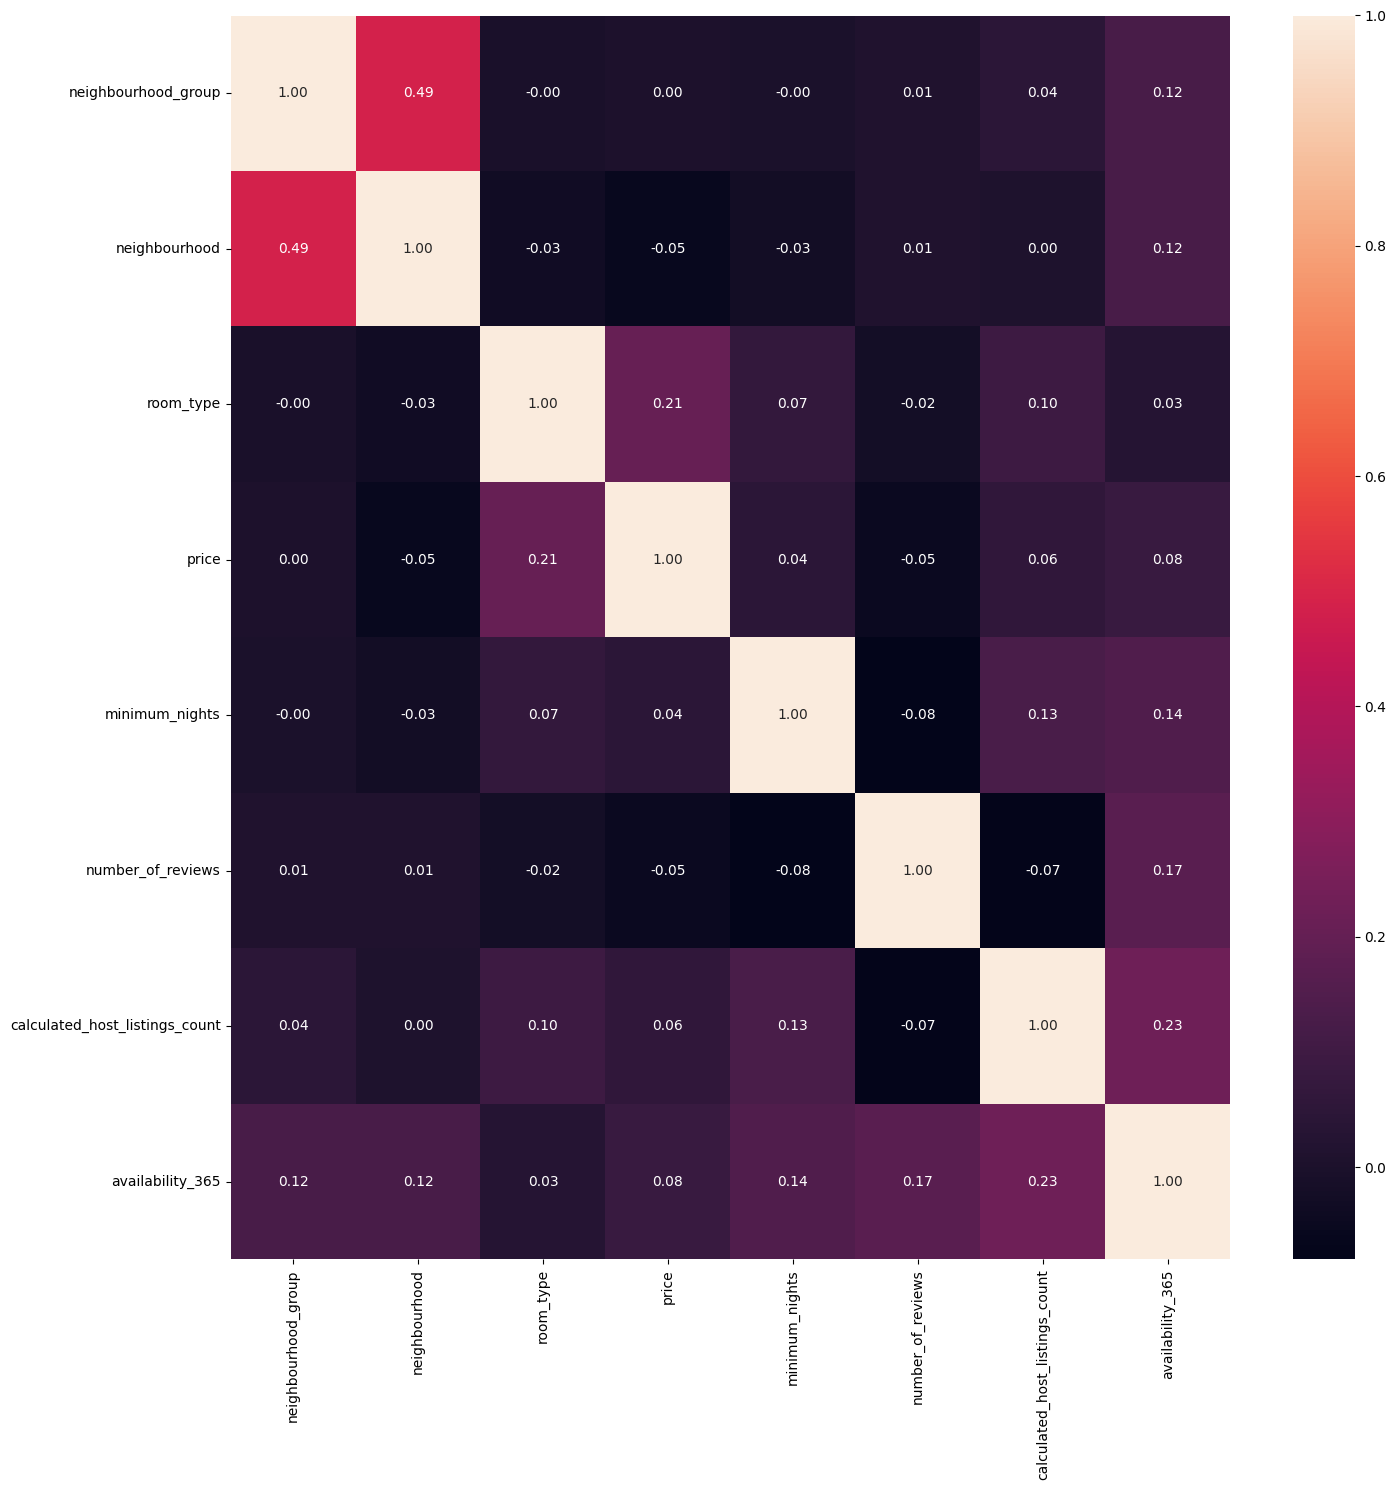

In [37]:
# Factorize the Room Type and Neighborhood Data
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Analysing all the Data at Once


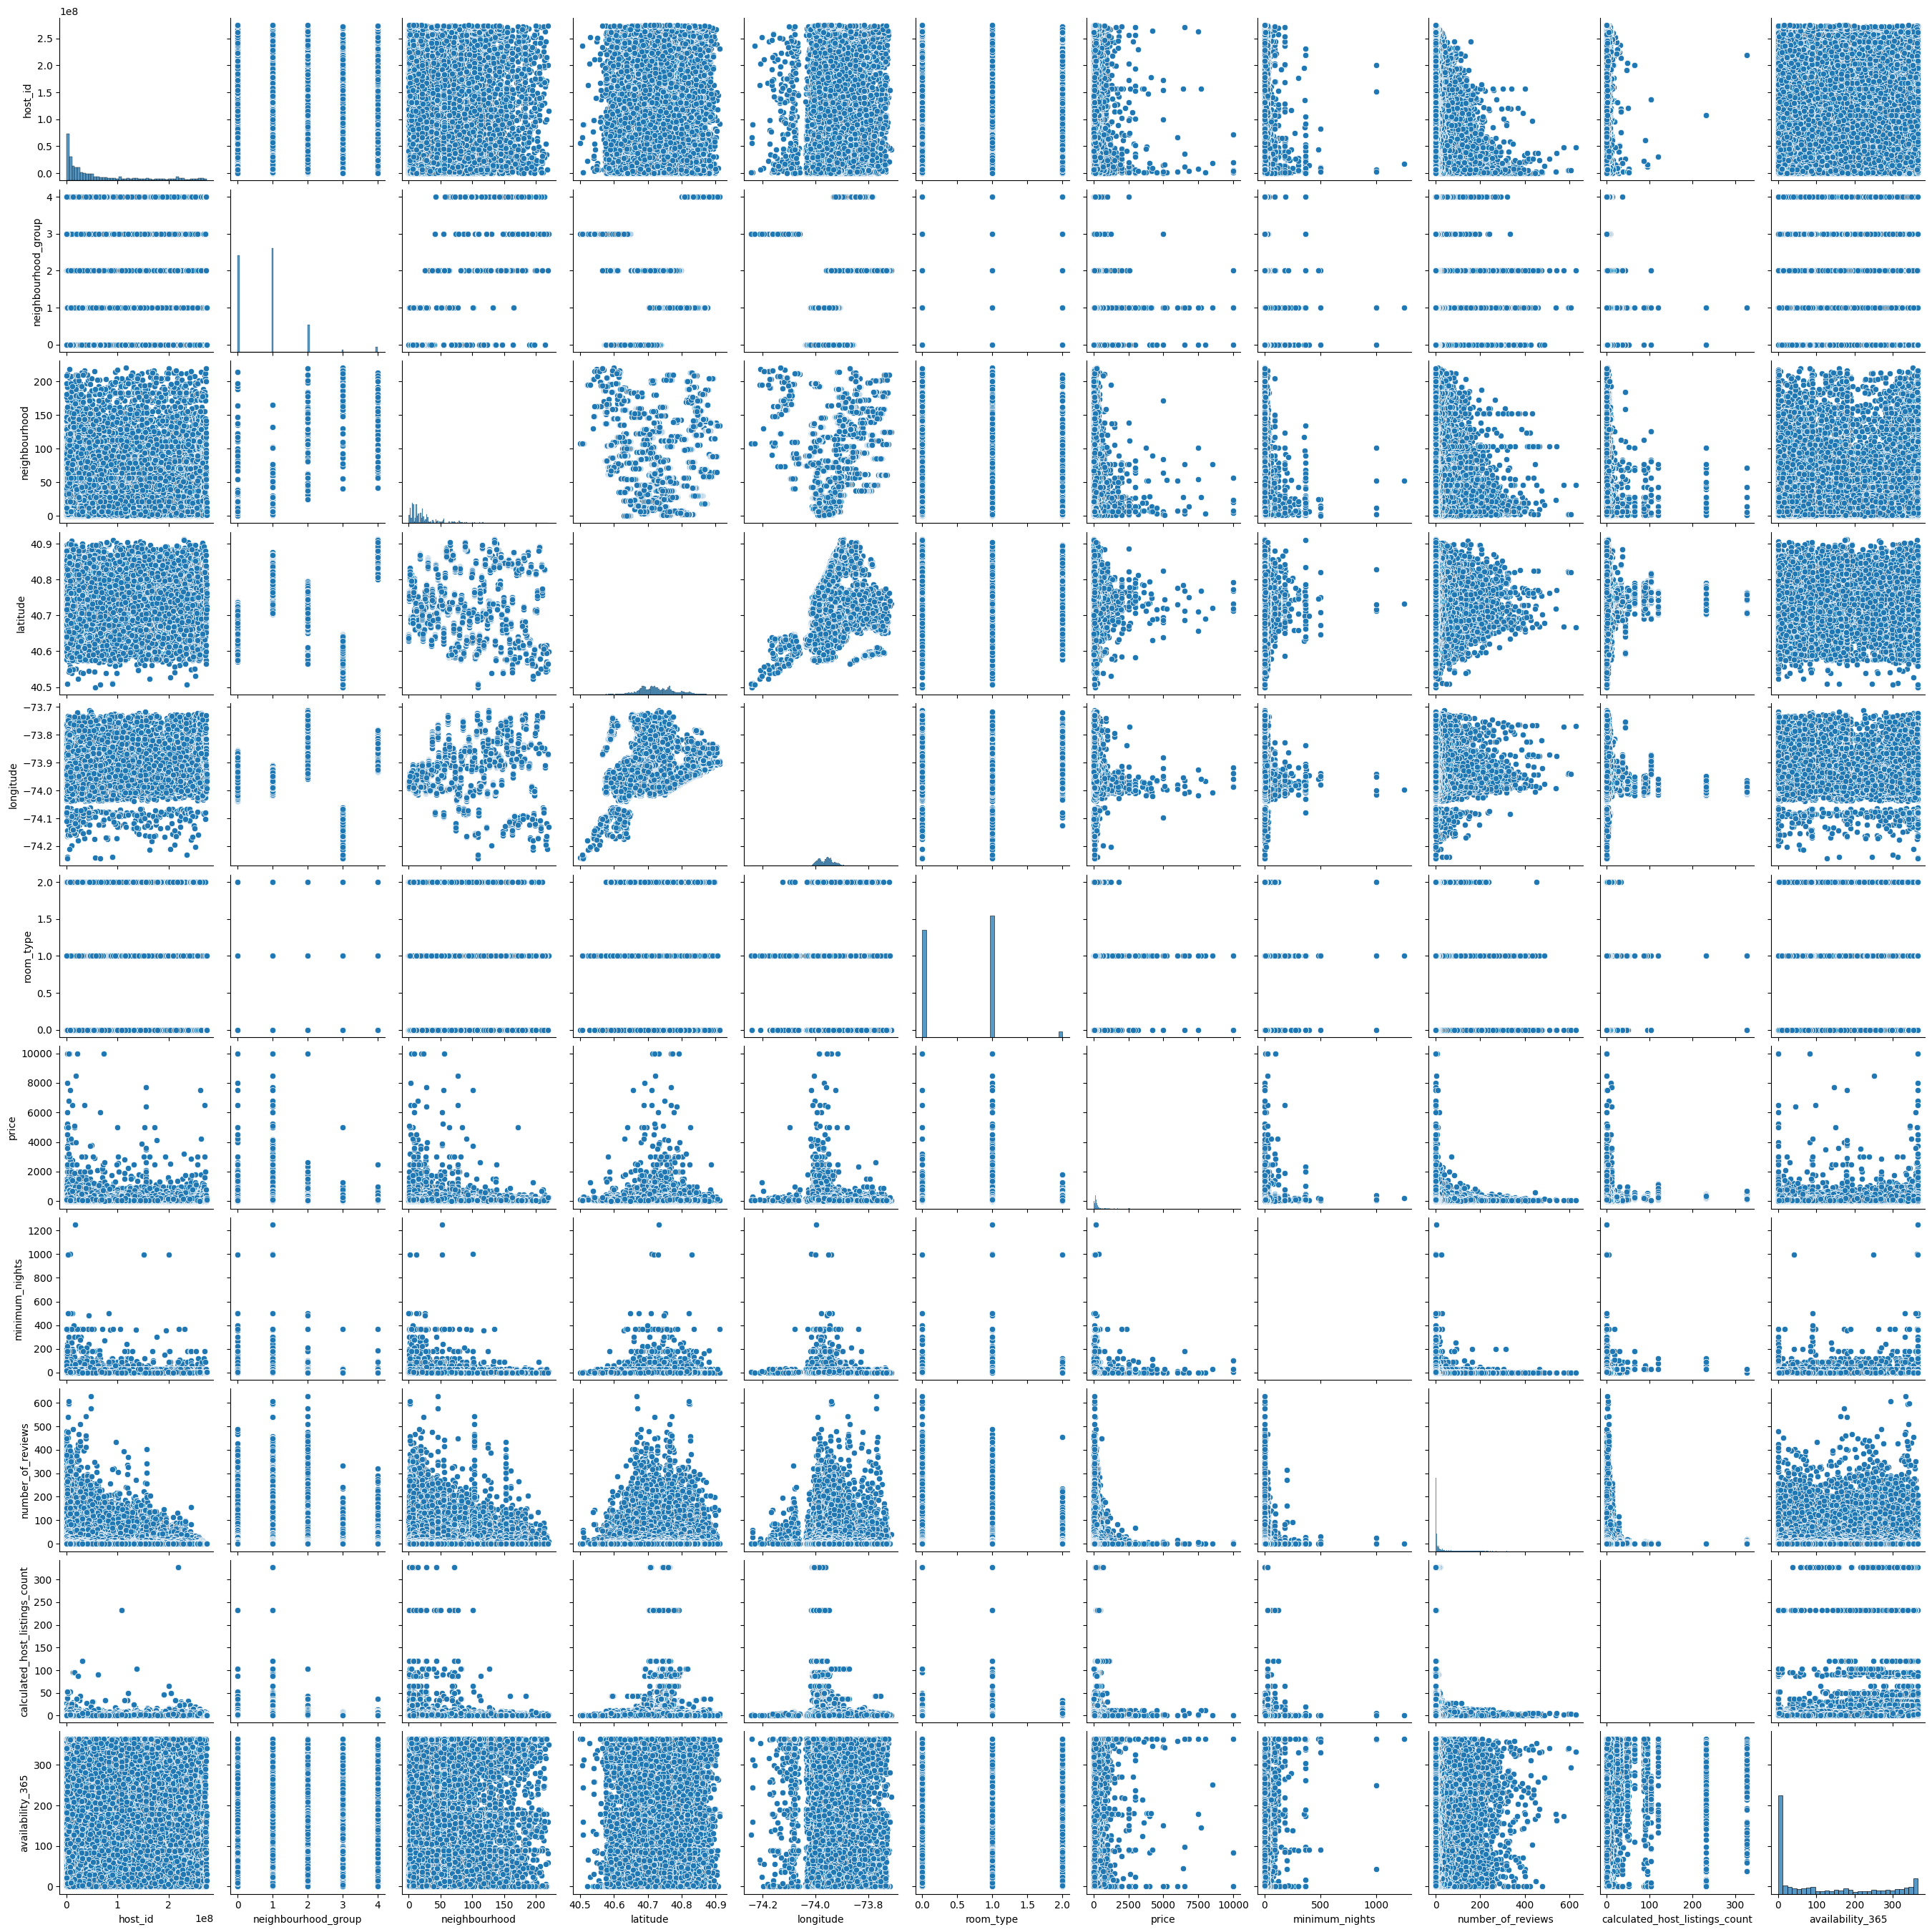

In [38]:
sns.pairplot(data = total_data)

Step 5: Feature engineering

Outlier analysis

In [39]:
total_data.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


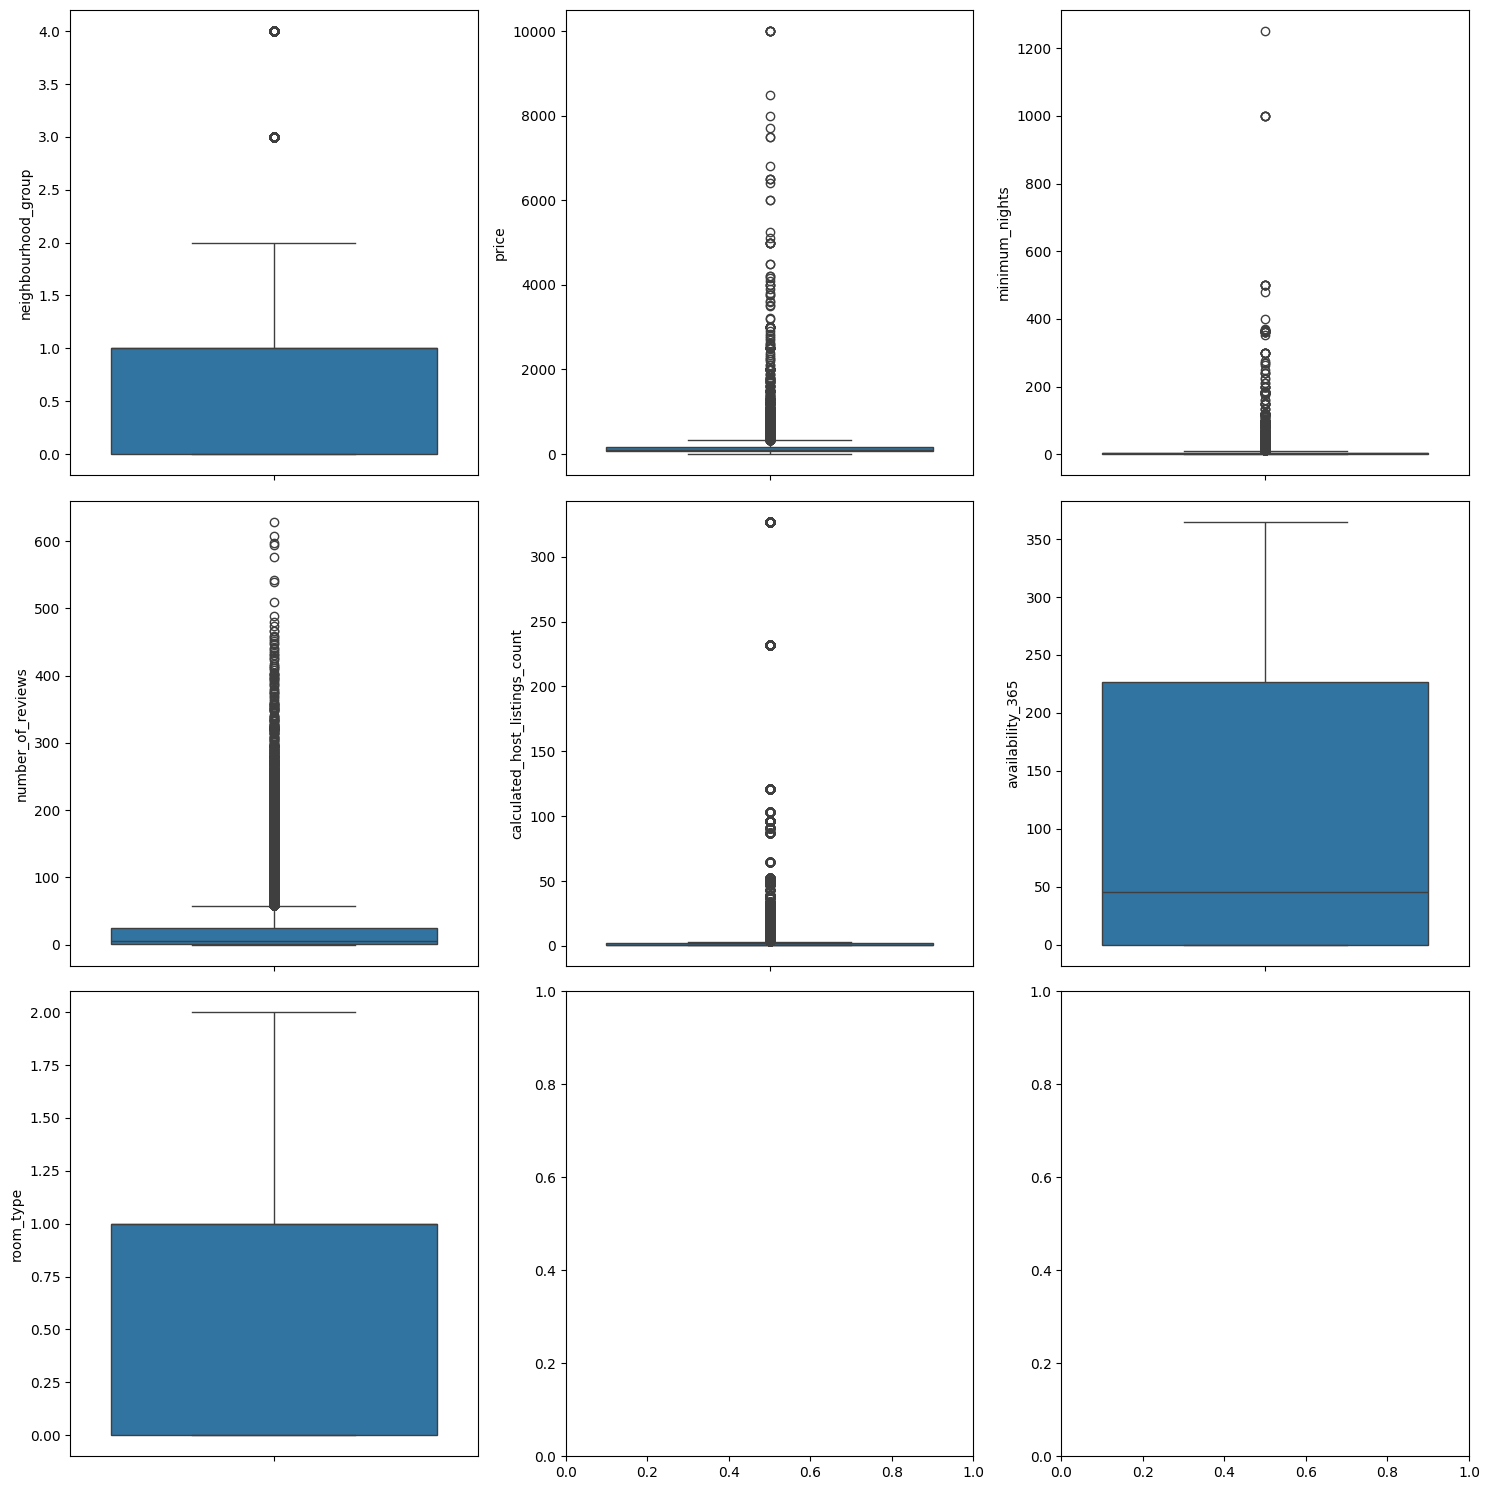

In [40]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type")

plt.tight_layout()

plt.show()

Outlier detection for price

In [41]:
# Stats for Price
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [42]:
# IQR for Price

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [43]:
# Clean the outliers

total_data = total_data[total_data["price"] > 0]

In [44]:
count_0 = total_data[total_data["price"] == 0].shape[0]
count_1 = total_data[total_data["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


Outlier detection for minimum_nights

In [45]:
nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [46]:
# IQR for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [47]:
# Clean the outliers

total_data = total_data[total_data["minimum_nights"] <= 15]

In [48]:
count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


Outlier detection for number_of_reviews

In [49]:
# Stats for number_of_reviews

review_stats = total_data["number_of_reviews"].describe()
review_stats


count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [50]:
# IQR for number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

The upper and lower limits for finding outliers are 66.0 and -38.0, with an interquartile range of 26.0


Outlier detection for calculated_host_listings_count

In [51]:
# Stats for calculated_host_listings_count

hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [52]:
# IQR for calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [53]:
count_04 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  40308
Count of 1:  30253
Count of 2:  6179


In [54]:
# Clean the outliers

total_data = total_data[total_data["calculated_host_listings_count"] > 4]

Missing value analysis

In [55]:
# Count NaN
total_data.isnull().sum().sort_values(ascending = False)

name                              1
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Feature scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.071429,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.071429,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.428571,0.003106,0.506849,0.0,0.0,98


Step 6: Feature selection

In [57]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.846575,0.0
1,0.071429,1.000000,0.169863,0.5
2,0.071429,0.000000,1.000000,0.0
3,0.428571,0.130435,0.926027,0.0
4,0.071429,1.000000,0.778082,0.5


Save the clean and raw data

In [58]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)